# 라이브러리 가져오기

In [2]:
import pandas as pd
import mysql.connector
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

--- [Single Thread] Starting Data Loading ---
Loaded a total of 500000 records.
Elapsed Time: 1.18 seconds

--- [Multi-Thread] Starting Data Loading ---
Loaded a total of 500000 records.
Elapsed Time: 8.08 seconds



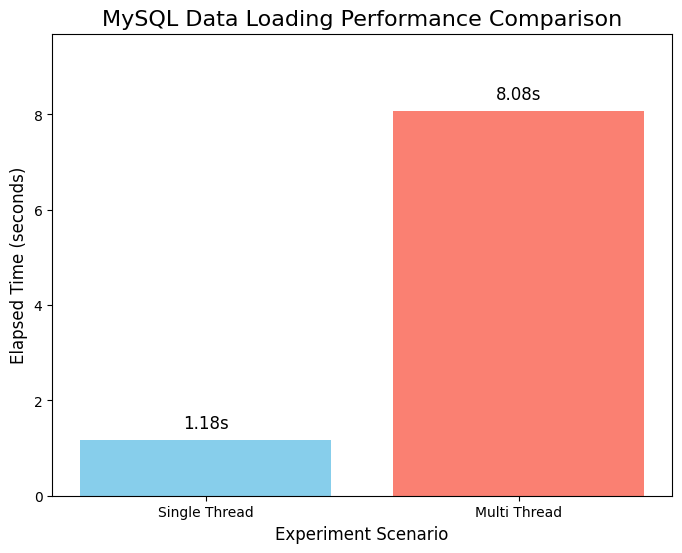

In [1]:
import pandas as pd
import mysql.connector
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# --- Database Connection Settings ---
DB_CONFIG = {
    'host': 'localhost',
    'user': 'evan',
    'password': '123456',
    'database': 'de_etl_book'
}
TABLE_NAME = 'coffee_sales'

# --- Scenario 1: Single-Threaded Data Loading ---
def single_thread_load():
    print("--- [Single Thread] Starting Data Loading ---")
    start_time = time.time()
    
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        cursor = conn.cursor()
        
        query = f"SELECT * FROM {TABLE_NAME};"
        cursor.execute(query)
        
        rows = cursor.fetchall()
        
        df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
        
        conn.close()
        
        end_time = time.time()
        
        print(f"Loaded a total of {len(df)} records.")
        elapsed_time = end_time - start_time
        print(f"Elapsed Time: {elapsed_time:.2f} seconds\n")
        return elapsed_time
    except Exception as e:
        print(f"An error occurred during single-thread loading: {e}")
        return None

# --- Scenario 2: Multi-Threaded Data Loading ---
def load_chunk(offset, chunk_size):
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        cursor = conn.cursor()
        
        query = f"SELECT * FROM {TABLE_NAME} LIMIT {chunk_size} OFFSET {offset}"
        cursor.execute(query)
        rows = cursor.fetchall()
        
        conn.close()
        return rows
    except Exception as e:
        print(f"An error occurred in a thread: {e}")
        return []

def multi_thread_load():
    print("--- [Multi-Thread] Starting Data Loading ---")
    
    # Get total number of records dynamically
    conn_count = mysql.connector.connect(**DB_CONFIG)
    cursor_count = conn_count.cursor()
    cursor_count.execute(f"SELECT COUNT(*) FROM {TABLE_NAME};")
    total_records = cursor_count.fetchone()[0]
    conn_count.close()

    # Experiment variables
    chunk_size = 50000
    num_workers = 8
    
    start_time = time.time()
    
    all_data = []
    offsets = range(0, total_records, chunk_size)
    
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        results = executor.map(load_chunk, offsets, [chunk_size] * len(offsets))
        
        for result in results:
            all_data.extend(result)
            
    df = pd.DataFrame(all_data)
    end_time = time.time()
    
    print(f"Loaded a total of {len(df)} records.")
    elapsed_time = end_time - start_time
    print(f"Elapsed Time: {elapsed_time:.2f} seconds\n")
    return elapsed_time

# Execute both scenarios and measure time
time_single = single_thread_load()
time_multi = multi_thread_load()

if time_single is None or time_multi is None:
    print("Experiment failed: An error occurred during database connection or loading.")
else:
    # Visualization
    scenario_names = ['Single Thread', 'Multi Thread']
    times = [time_single, time_multi]
    
    plt.figure(figsize=(8, 6))
    plt.bar(scenario_names, times, color=['skyblue', 'salmon'])
    plt.title('MySQL Data Loading Performance Comparison', fontsize=16)
    plt.xlabel('Experiment Scenario', fontsize=12)
    plt.ylabel('Elapsed Time (seconds)', fontsize=12)
    plt.ylim(0, max(times) * 1.2)
    
    for i, time_val in enumerate(times):
        plt.text(i, time_val + max(times)*0.03, f'{time_val:.2f}s', ha='center', fontsize=12)

    plt.show()

--- [단일 스레드] 데이터 로딩 및 CSV 파일 저장 시작 ---
총 500000개의 레코드를 로드하고 'output_single.csv'에 저장했습니다.
경과 시간: 2.16 초

--- [멀티 스레드] 데이터 로딩 및 CSV 파일 저장 시작 ---
총 500000개의 레코드를 로드하고 'output_multi.csv'에 저장했습니다.
경과 시간: 9.05 초



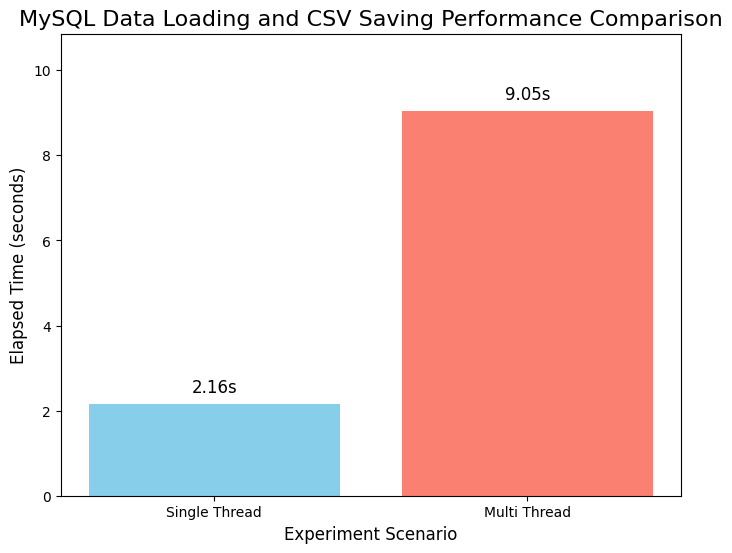

In [5]:
import pandas as pd
import mysql.connector
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# --- 데이터베이스 연결 설정 ---
DB_CONFIG = {
    'host': 'localhost',
    'user': 'evan',
    'password': '123456',
    'database': 'de_etl_book'
}
TABLE_NAME = 'coffee_sales'

# --- 시나리오 1: 단일 스레드 데이터 로딩 및 CSV 저장 ---
def single_thread_load_and_save():
    print("--- [단일 스레드] 데이터 로딩 및 CSV 파일 저장 시작 ---")
    start_time = time.time()
    
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        cursor = conn.cursor()
        
        query = f"SELECT * FROM {TABLE_NAME};"
        cursor.execute(query)
        
        rows = cursor.fetchall()
        
        df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
        
        conn.close()
        
        # 데이터를 CSV 파일로 저장
        df.to_csv('output_single.csv', index=False)
        
        end_time = time.time()
        
        print(f"총 {len(df)}개의 레코드를 로드하고 'output_single.csv'에 저장했습니다.")
        elapsed_time = end_time - start_time
        print(f"경과 시간: {elapsed_time:.2f} 초\n")
        return elapsed_time
    except Exception as e:
        print(f"단일 스레드 로딩 및 저장 중 오류가 발생했습니다: {e}")
        return None

# --- 시나리오 2: 멀티 스레드 데이터 로딩 ---
def load_chunk(offset, chunk_size):
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        cursor = conn.cursor()
        
        query = f"SELECT * FROM {TABLE_NAME} LIMIT {chunk_size} OFFSET {offset}"
        cursor.execute(query)
        rows = cursor.fetchall()
        
        conn.close()
        return rows
    except Exception as e:
        print(f"스레드에서 오류가 발생했습니다: {e}")
        return []

# --- 시나리오 2: 멀티 스레드 데이터 로딩 및 CSV 저장 ---
def multi_thread_load_and_save():
    print("--- [멀티 스레드] 데이터 로딩 및 CSV 파일 저장 시작 ---")
    
    # 총 레코드 수를 동적으로 가져오기
    conn_count = mysql.connector.connect(**DB_CONFIG)
    cursor_count = conn_count.cursor()
    cursor_count.execute(f"SELECT COUNT(*) FROM {TABLE_NAME};")
    total_records = cursor_count.fetchone()[0]
    conn_count.close()

    # 실험 변수
    chunk_size = 50000
    num_workers = 8
    
    start_time = time.time()
    
    all_data = []
    offsets = range(0, total_records, chunk_size)
    
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        results = executor.map(load_chunk, offsets, [chunk_size] * len(offsets))
        
        for result in results:
            all_data.extend(result)
            
    df = pd.DataFrame(all_data)
    
    # 데이터를 CSV 파일로 저장
    df.to_csv('output_multi.csv', index=False)
    
    end_time = time.time()
    
    print(f"총 {len(df)}개의 레코드를 로드하고 'output_multi.csv'에 저장했습니다.")
    elapsed_time = end_time - start_time
    print(f"경과 시간: {elapsed_time:.2f} 초\n")
    return elapsed_time

# 두 시나리오 모두 실행하고 시간 측정
if __name__ == "__main__":
    
    time_single = single_thread_load_and_save()
    time_multi = multi_thread_load_and_save()
    
    if time_single is None or time_multi is None:
        print("실험 실패: 데이터베이스 연결 또는 로딩 중 오류가 발생했습니다.")
    else:
        # 시각화
        scenario_names = ['Single Thread', 'Multi Thread']
        times = [time_single, time_multi]
        
        plt.figure(figsize=(8, 6))
        plt.bar(scenario_names, times, color=['skyblue', 'salmon'])
        plt.title('MySQL Data Loading and CSV Saving Performance Comparison', fontsize=16)
        plt.xlabel('Experiment Scenario', fontsize=12)
        plt.ylabel('Elapsed Time (seconds)', fontsize=12)
        plt.ylim(0, max(times) * 1.2)
        
        for i, time_val in enumerate(times):
            plt.text(i, time_val + max(times)*0.03, f'{time_val:.2f}s', ha='center', fontsize=12)

        plt.show()